<a href="https://colab.research.google.com/github/tbradshaw91/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/College_Majors_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ** -- College Majors Theory -- **

**Data Source: Data.world & Pew Research -- Originally put together by fivethirtyeight**



---



In [2]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 14.1MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


**Pulling in all of the dataframes related to my research. I may or may not use them all, but it is good to have all of my data in one place to reference.  **

In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import pandas as pd 

# Pulling in my DF
ages_df = 'https://query.data.world/s/gpe2sgsocg7ru2jccqrueoxtgyanvq'

# Assigning a new name to call it
ages = pd.read_csv(ages_df)

In [0]:
grad_students_df = 'https://query.data.world/s/dokg22nzpeop44ucb5jddqnafhdpof'
grad_students = pd.read_csv(grad_students_df)

In [0]:
majors_list_df = 'https://query.data.world/s/gm4rcgbkotyels5353ux45uoowkyrh'
majors_list = pd.read_csv(majors_list_df)

In [0]:
recent_grads_df = 'https://query.data.world/s/e64g4m5iajb4afuc2u5gdg4hl5phmp'
recent_grads = pd.read_csv(recent_grads_df)

In [0]:
women_stem_df = 'https://query.data.world/s/fwefnniaqi5qzse5ijnipvrf6fbzgh'
women_stem = pd.read_csv(women_stem_df)

**Now that I have all of my data loaded, I am going to check out what each DF has to offer, look at the shape and select a couple of frames to begin visualizing.**

In [0]:
ages.head()

In [8]:
ages.shape

(173, 11)

**Note: Grad Students are presumably 25 + **

In [0]:
grad_students.head()

In [9]:
grad_students.shape

(173, 22)

In [0]:
majors_list.head()

**Note: Recent Grads are presumably <28**

In [0]:
recent_grads.head()

In [0]:
women_stem.head()

In [10]:
women_stem.shape

(76, 9)

I aim to perform a basic analysis to solve the question of why there are not more women in technology? My belief is that women are not pursuing stem related degrees. Thus, there are not enough qualified female applicants for tech related job openings. I believe if I am able to prove my theory, we can then begin the conversation of how do we get more women interested in pursuing a stem degree. 

**Since the goal is to examine what women go to school for, it is beneficial to look at all the degrees sorted into women, then go into stem specifically **

In [9]:
# Will need to look at recent grads in order to achieve this
recent_grads.columns

# The columns that matter for this are major, major category, total and men, women

Index(['Rank', 'Major_code', 'Major', 'Major_category', 'Total', 'Sample_size',
       'Men', 'Women', 'ShareWomen', 'Employed', 'Full_time', 'Part_time',
       'Full_time_year_round', 'Unemployed', 'Unemployment_rate', 'Median',
       'P25th', 'P75th', 'College_jobs', 'Non_college_jobs', 'Low_wage_jobs'],
      dtype='object')

In [0]:
# First I will check for nulls
recent_grads.isna().sum()

# We have 1 in Unemployment Rate, but I am not concerned about it since I am not focusing on unemployment just yet. 

In [0]:
# Create a new DF for these cols exactly
what_majors = (recent_grads[['Major_code', 'Major', 'Major_category', 'Total', 'Men', 'Women']])

In [0]:
what_majors.head()



---



**Working on visualizations aimed towards:**

** Total first, in order to see a high level, non gender pov **
*   Total vs Major


** Majors from a high level then filtered down by specifics and gender **

*   Major vs Men
*   Major vs Women



In [0]:
# This doesn't tell me much, a plot that allows for categorical variables would be a better indicator unless i was to encode things
# Adding the Major_code is a way to visualize using numeric values only
what_majors.plot.scatter(x='Total', y='Women');
what_majors.plot.scatter(x='Total', y='Men');

**Creating a DF for Major Category and Totals**

In [0]:
totals_mc = (what_majors[['Total', 'Major_category', 'Major']])

**By sorting values high to low, I was able to see the top 10 categories both sexes pursue in college**

In [12]:
totals_mc.sort_values(by='Total', ascending=False).head(10)

,Total,Major_category,Major
145,393735,Psychology & Social Work,PSYCHOLOGY
76,329927,Business,BUSINESS MANAGEMENT AND ADMINISTRATION
123,280709,Biology & Life Science,BIOLOGY
57,234590,Business,GENERAL BUSINESS
93,213996,Communications & Journalism,COMMUNICATIONS
34,209394,Health,NURSING
77,205211,Business,MARKETING AND MARKETING RESEARCH
40,198633,Business,ACCOUNTING
137,194673,Humanities & Liberal Arts,ENGLISH LANGUAGE AND LITERATURE
78,182621,Social Science,POLITICAL SCIENCE AND GOVERNMENT


**Based on this, the most people go for a degree in Psychology**

**Something to mess with...there are multiple business categories being shown, I changed this by switching from Major_category to just Major since it is more precise. If I decide to change this, I can refer back to below **

In [0]:
#import numpy as np

#repeater = ['Business']

#def clean_title(x):
  #if isinstance(x, str):
   
    #return x.strip().title()
  
  #else: 
    #return 'Robot'
  
#[clean_title(x) for x in repeater]
#---------
#df['emp_title'] = df['emp_title'].apply(clean_title)

['Business']

In [13]:
# Just pulling the top 10 largest
total_count = totals_mc.nlargest(10, 'Total')
total_count

,Total,Major_category,Major
145,393735,Psychology & Social Work,PSYCHOLOGY
76,329927,Business,BUSINESS MANAGEMENT AND ADMINISTRATION
123,280709,Biology & Life Science,BIOLOGY
57,234590,Business,GENERAL BUSINESS
93,213996,Communications & Journalism,COMMUNICATIONS
34,209394,Health,NURSING
77,205211,Business,MARKETING AND MARKETING RESEARCH
40,198633,Business,ACCOUNTING
137,194673,Humanities & Liberal Arts,ENGLISH LANGUAGE AND LITERATURE
78,182621,Social Science,POLITICAL SCIENCE AND GOVERNMENT


### **The Top 10 Majors Pursued by Men and Women.. Number 1 is Psychology**

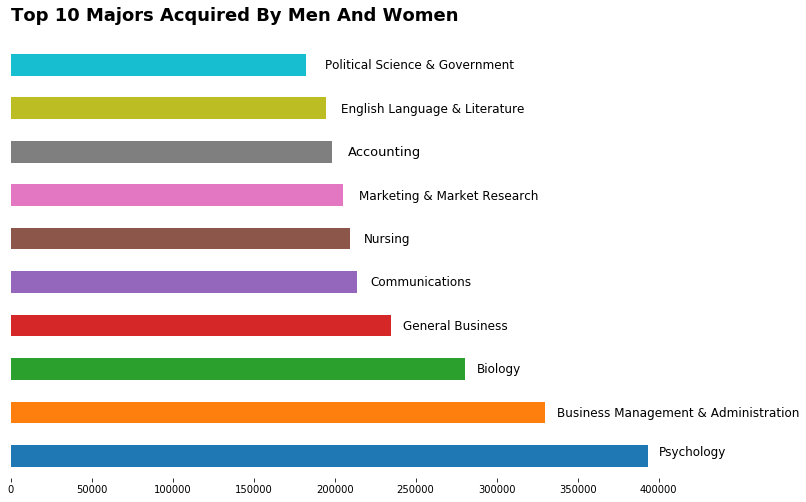

In [90]:
# Plotting the top 10 largest
ax = total_count.plot.barh(x='Major', y='Total', figsize=(12,8))
# Title and Subtitle
ax.text(s="Top 10 Majors Acquired By Men And Women ", y=10, x=-5, fontsize=18, fontweight='semibold')
# The little details
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('')
ax.yaxis.set_visible(False)
ax.get_legend().remove()
# Setting Labels
ax.text(x=194000,y=8.9, s="Political Science & Government", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=204000,y=7.9, s="English Language & Literature", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=208000,y=6.9, s="Accounting", fontsize=13, fontweight='light', color=('#000000'));
ax.text(x=215000,y=5.9, s="Marketing & Market Research", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=218000,y=4.9, s="Nursing", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=222000,y=3.9, s="Communications", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=242000,y=2.9, s="General Business", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=288000,y=1.9, s="Biology", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=337000,y=.9, s="Business Management & Administration", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=400000,y=.01, s="Psychology", fontsize=12, fontweight='light', color=('#000000'));



---



**Let's sort this into Men**

In [0]:
men_majors = (what_majors[['Men', 'Major_category', 'Major']])

**Top 10 things men major in **

In [21]:
men_majors.sort_values(by='Men', ascending=False).head(10)

,Men,Major_category,Major
79,173809,Social Science,GEOGRAPHY
70,132238,Psychology & Social Work,INDUSTRIAL AND ORGANIZATIONAL PSYCHOLOGY
36,115030,Social Science,ECONOMICS
123,111762,Biology & Life Science,BIOLOGY
21,99743,Agriculture & Natural Resources,FOOD SCIENCE
48,94519,Biology & Life Science,PHARMACOLOGY
78,93880,Social Science,POLITICAL SCIENCE AND GOVERNMENT
35,89749,Business,FINANCE
145,86648,Psychology & Social Work,PSYCHOLOGY
12,80320,Engineering,BIOMEDICAL ENGINEERING


In [0]:
# Sorting the top 10 mens counts, I already did this above 
# but this is just assigning it to a variable
men = men_majors.nlargest(10, 'Men')

**As with above, I simply changed the X to Major instead of MC and that simplified the majors without having to combine. Although I may want to later**

### **The Top Major Men go for is Geology...that was surprising**

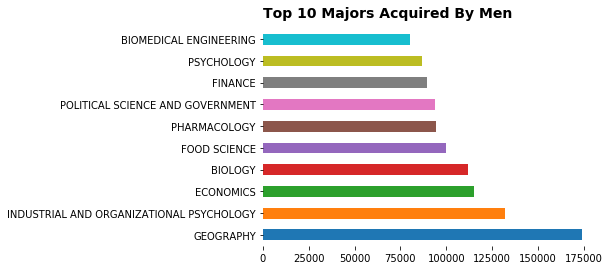

In [95]:
# Plotting top 10 mens categories for majors
# Plotting the top 10 largest
ax = men.plot.barh(x='Major', y='Men')
#fig.patch.set_facecolor('#ececec')
# Title and Subtitle
ax.text(s="Top 10 Majors Acquired By Men ", y=10, x=-5, fontsize=14, fontweight='semibold')
# The little details
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('')
ax.get_legend().remove();



---



**Looking at women**

In [0]:
women_majors = (what_majors[['Women', 'Major_category', 'Major']])

**Top 10 things Women major in**

In [97]:
# Sorting the top 10 womens counts
women = women_majors.nlargest(10, 'Women')
women

,Women,Major_category,Major
145,307087,Psychology & Social Work,PSYCHOLOGY
34,187621,Health,NURSING
123,168947,Biology & Life Science,BIOLOGY
138,157833,Education,ELEMENTARY EDUCATION
79,156118,Social Science,GEOGRAPHY
97,143377,Physical Sciences,MULTI-DISCIPLINARY OR GENERAL SCIENCE
140,136446,Humanities & Liberal Arts,LIBERAL ARTS
80,126354,Biology & Life Science,MICROBIOLOGY
113,116825,Education,GENERAL EDUCATION
48,104114,Biology & Life Science,PHARMACOLOGY


### **Based on this data, it appears more women tend to major in Psychology followed by nursing**





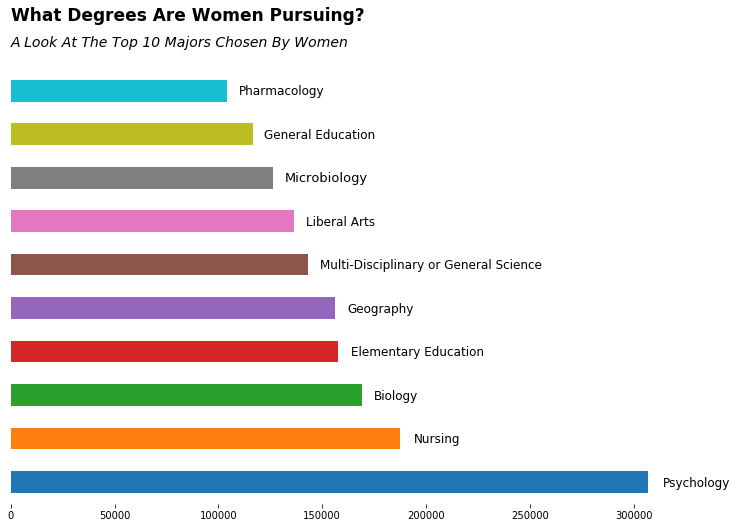

In [234]:
# Using the five thirty eight style
plt.style.context('fivethirtyeight')
# Plotting top 10 Womens categories for majors
ax = women.plot.barh(x='Major', y='Women', figsize=(12,8))
#fig.patch.set_facecolor('#ececec')
# Title and Subtitle
ax.text(s="What Degrees Are Women Pursuing?", y=10.6, x=-5, fontsize=17, fontweight='semibold')
ax.text(s="A Look At The Top 10 Majors Chosen By Women ", y=10, x=-5, fontsize=14, fontstyle='italic')
# The little details
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('')
ax.yaxis.set_visible(False)
ax.get_legend().remove()
ax.text(x=110000,y=8.9, s="Pharmacology", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=122000,y=7.9, s="General Education", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=132000,y=6.9, s="Microbiology", fontsize=13, fontweight='light', color=('#000000'));
ax.text(x=142000,y=5.9, s="Liberal Arts", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=149000,y=4.9, s="Multi-Disciplinary or General Science", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=162000,y=3.9, s="Geography", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=164000,y=2.9, s="Elementary Education", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=175000,y=1.9, s="Biology", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=194000,y=.9, s="Nursing", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=314000,y=-0.10, s="Psychology", fontsize=12, fontweight='light', color=('#000000'));



---






**I have looked at these things individually, I would like to explore how they are compared to eachother **


*   Totals broken into Men and Women
*   Via crosstab or pt?
*   Histogram of some sort

*   Men vs Women in Majors



**Setting up a DF for the things I care about**

In [0]:
major_df = what_majors[['Major', 'Major_category', 'Men', 'Women', 'Total']]

In [0]:
# For this purpose, I am only interested in the top 10
# This is essentially another DF sorted by top 10
major_totals = major_df.nlargest(10, 'Total')

In [0]:
# Grouping Sex
# Don't need this, just saving it incase
sex = major_df[['Men', 'Women']]


In [0]:
# Getting percentage
# Don't need this. Just saving this incase
percentage = pd.crosstab(index=major_df.Total, columns=major_df.Major, normalize='index') * 100

In [0]:
# Shitty plot
sns.catplot('Women','Men', 'Major', data=major_totals, kind='swarm', alpha=0.8);

In [150]:
major_totals

,Major,Major_category,Men,Women,Total
145,PSYCHOLOGY,Psychology & Social Work,86648,307087,393735
76,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,6383,8849,329927
123,BIOLOGY,Biology & Life Science,111762,168947,280709
57,GENERAL BUSINESS,Business,6053,4346,234590
93,COMMUNICATIONS,Communications & Journalism,476,209,213996
34,NURSING,Health,21773,187621,209394
77,MARKETING AND MARKETING RESEARCH,Business,11404,7076,205211
40,ACCOUNTING,Business,27392,9306,198633
137,ENGLISH LANGUAGE AND LITERATURE,Humanities & Liberal Arts,4897,2519,194673
78,POLITICAL SCIENCE AND GOVERNMENT,Social Science,93880,88741,182621




---



## **Now that I have examined each thing individually, I would like to look at stem related careers **

In [151]:
# Looking at everyone involved in stem, these are the top 10 pursuits
top_stem = women_stem.nlargest(10, 'Total')
top_stem

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
70,71,3600,BIOLOGY,Biology & Life Science,280709,111762,168947,0.601858,33400
26,27,6107,NURSING,Health,209394,21773,187621,0.896019,48000
18,19,2102,COMPUTER SCIENCE,Computers & Mathematics,128319,99743,28576,0.222695,53000
7,8,2414,MECHANICAL ENGINEERING,Engineering,91227,80320,10907,0.119559,60000
9,10,2408,ELECTRICAL ENGINEERING,Engineering,81527,65511,16016,0.196450,60000
33,34,3700,MATHEMATICS,Computers & Mathematics,72397,39956,32441,0.448099,45000
50,51,5003,CHEMISTRY,Physical Sciences,66530,32923,33607,0.505141,39000
62,63,5098,MULTI-DISCIPLINARY OR GENERAL SCIENCE,Physical Sciences,62052,27015,35037,0.564639,35000
16,17,2400,GENERAL ENGINEERING,Engineering,61152,45683,15469,0.252960,56000
22,23,2406,CIVIL ENGINEERING,Engineering,53153,41081,12072,0.227118,50000


### **The Top Stem Major Pursued Is Biology**

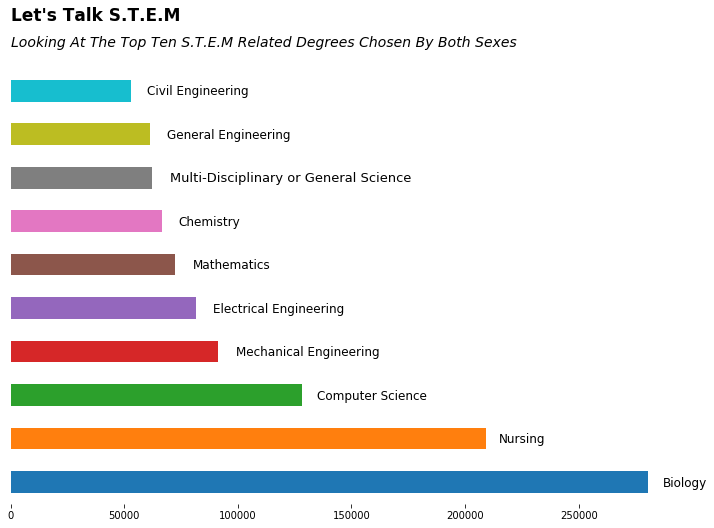

In [233]:
# Using the five thirty eight style
plt.style.context('fivethirtyeight')
# Plotting Top 10 Stem Majors
ax = top_stem.plot.barh(x='Major', y='Total', figsize=(12,8))
# Title and Subtitle
ax.text(s="Let's Talk S.T.E.M ", y=10.6, x=-5, fontsize=17, fontweight='semibold')
ax.text(s="Looking At The Top Ten S.T.E.M Related Degrees Chosen By Both Sexes ", y=10, x=-5, fontsize=14, fontstyle='italic')
# The little details
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('')
ax.get_legend().remove()
ax.yaxis.set_visible(False)
# Plotting Labels
ax.text(x=60000,y=8.9, s="Civil Engineering", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=69000,y=7.9, s="General Engineering", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=70000,y=6.9, s="Multi-Disciplinary or General Science", fontsize=13, fontweight='light', color=('#000000'));
ax.text(x=74000,y=5.9, s="Chemistry", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=80000,y=4.9, s="Mathematics", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=89000,y=3.9, s="Electrical Engineering", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=99000,y=2.9, s="Mechanical Engineering", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=135000,y=1.9, s="Computer Science", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=215000,y=.9, s="Nursing", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=287000,y=-0.10, s="Biology", fontsize=12, fontweight='light', color=('#000000'));

**Top 10 Stem Related Degrees Women Pursue**

In [0]:
# Setting up a DF just for Women
stem_chicks = women_stem[['Major', 'Major_category', 'Women', 'Total', 'ShareWomen']]
stem_chicks

In [182]:
# Looking at the top 10 stem careers for women
fem_stem = stem_chicks.nlargest(10, 'Women')
fem_stem

,Major,Major_category,Women,Total,ShareWomen
26,NURSING,Health,187621,209394,0.896019
70,BIOLOGY,Biology & Life Science,168947,280709,0.601858
74,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,37054,38279,0.967998
62,MULTI-DISCIPLINARY OR GENERAL SCIENCE,Physical Sciences,35037,62052,0.564639
72,TREATMENT THERAPY PROFESSIONS,Health,35004,48491,0.721866
50,CHEMISTRY,Physical Sciences,33607,66530,0.505141
33,MATHEMATICS,Computers & Mathematics,32441,72397,0.448099
18,COMPUTER SCIENCE,Computers & Mathematics,28576,128319,0.222695
73,GENERAL MEDICAL AND HEALTH SERVICES,Health,26025,33599,0.774577
46,ARCHITECTURE,Engineering,20957,46420,0.451465


### **Based on the data, the top stem career women pursue is Nursing with women holding an 89% share of that degree **

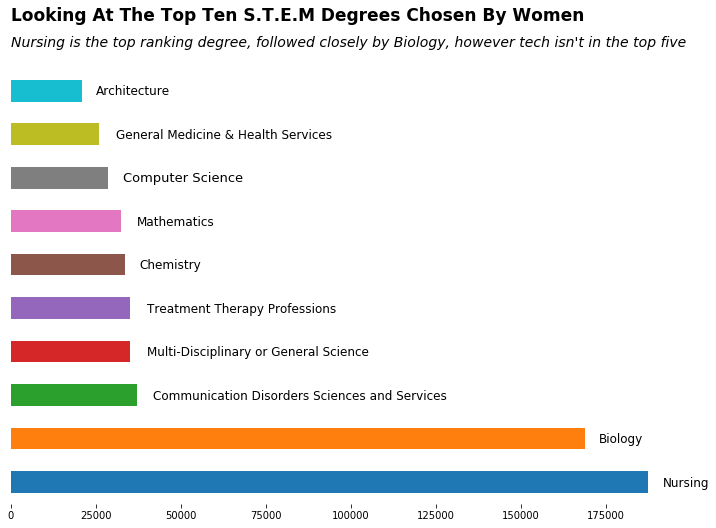

In [230]:
# Using the five thirty eight style
plt.style.context('fivethirtyeight')
# Plotting Top 10 Womens Stem Majors
ax = fem_stem.plot.barh(x='Major', y='Women', figsize=(12,8))
# Title and Subtitle
ax.text(s="Nursing is the top ranking degree, followed closely by Biology, however tech isn't in the top five ", y=10, x=-5, fontsize=14, fontstyle='italic')
ax.text(s="Looking At The Top Ten S.T.E.M Degrees Chosen By Women ", y=10.6, x=-5, fontsize=17, fontweight='semibold')
# The little details
#ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('')
ax.get_legend().remove()
ax.yaxis.set_visible(False)
# Plotting Labels
ax.text(x=25000,y=8.9, s="Architecture", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=31000,y=7.9, s="General Medicine & Health Services", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=33000,y=6.9, s="Computer Science", fontsize=13, fontweight='light', color=('#000000'));
ax.text(x=37000,y=5.9, s="Mathematics", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=38000,y=4.9, s="Chemistry", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=40000,y=3.9, s="Treatment Therapy Professions", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=40000,y=2.9, s="Multi-Disciplinary or General Science", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=42000,y=1.9, s="Communication Disorders Sciences and Services", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=173000,y=.9, s="Biology", fontsize=12, fontweight='light', color=('#000000'));
ax.text(x=192000,y=-0.10, s="Nursing", fontsize=12, fontweight='light', color=('#000000'));

### **What Share Of Major Percentage Women Hold**

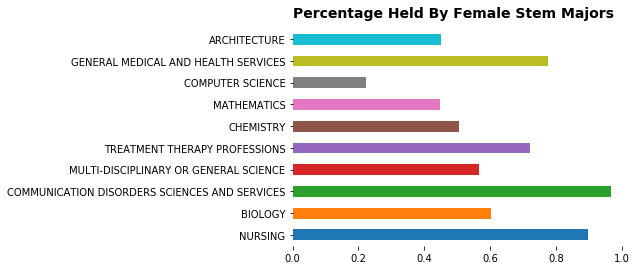

In [216]:
# Using the five thirty eight style
plt.style.context('fivethirtyeight')
# Plotting Percentage held by Womens Stem Majors
ax = fem_stem.plot.barh(x='Major', y='ShareWomen')
# Title and Subtitle
ax.text(s="Percentage Held By Female Stem Majors", y=10, x=0, fontsize=14, fontweight='semibold')
# The little details
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('')
ax.get_legend().remove();

**Top 10 Stem related Degrees Men Pursue**

In [0]:
# Setting up a DF just for Men
stem_dudes = women_stem[['Major', 'Major_category', 'Men', 'Total']]
stem_dudes

In [218]:
men_stem = stem_dudes.nlargest(10, 'Men')
men_stem

,Major,Major_category,Men,Total
70,BIOLOGY,Biology & Life Science,111762,280709
18,COMPUTER SCIENCE,Computers & Mathematics,99743,128319
7,MECHANICAL ENGINEERING,Engineering,80320,91227
9,ELECTRICAL ENGINEERING,Engineering,65511,81527
16,GENERAL ENGINEERING,Engineering,45683,61152
22,CIVIL ENGINEERING,Engineering,41081,53153
33,MATHEMATICS,Computers & Mathematics,39956,72397
10,COMPUTER ENGINEERING,Engineering,33258,41542
50,CHEMISTRY,Physical Sciences,32923,66530
30,COMPUTER AND INFORMATION SYSTEMS,Computers & Mathematics,27392,36698


### **The Top Stem Major Men Pursue Is Biology**

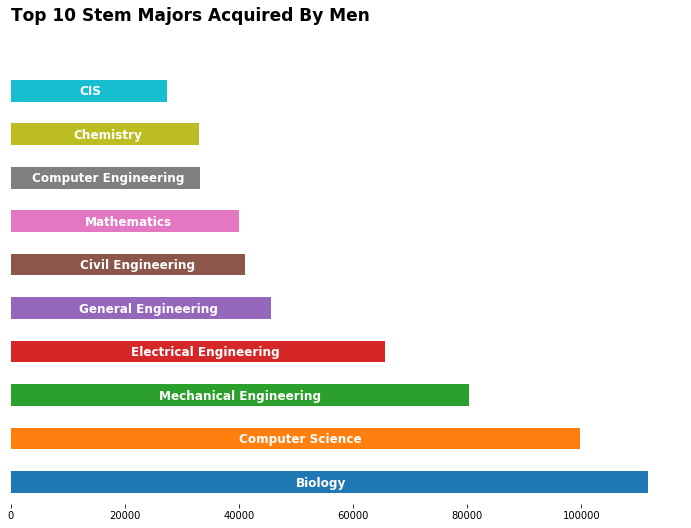

In [281]:
# Using the five thirty eight style
plt.style.context('fivethirtyeight')
# Plotting top 10 Men categories for majors
ax = men_stem.plot.barh(x='Major', y='Men', figsize=(12,8))
# Title and Subtitle
ax.text(s="Top 10 Stem Majors Acquired By Men ", y=10.6, x=-5, fontsize=17, fontweight='semibold')
# The little details
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('')
ax.get_legend().remove()
ax.yaxis.set_visible(False)
# Plotting Labels
ax.text(x=12000,y=8.9, s="CIS", fontsize=12, fontweight='semibold', color=('#FFFFFF'));
ax.text(x=11000,y=7.9, s="Chemistry", fontsize=12, fontweight='semibold', color=('#FFFFFF'));
ax.text(x=3800,y=6.9, s="Computer Engineering", fontsize=12, fontweight='semibold', color=('#FFFFFF'));
ax.text(x=13000,y=5.9, s="Mathematics", fontsize=12, fontweight='semibold', color=('#FFFFFF'));
ax.text(x=12090,y=4.9, s="Civil Engineering", fontsize=12, fontweight='semibold', color=('#FFFFFF'));
ax.text(x=11900,y=3.9, s="General Engineering", fontsize=12, fontweight='semibold', color=('#FFFFFF'));
ax.text(x=21000,y=2.9, s="Electrical Engineering", fontsize=12, fontweight='semibold', color=('#FFFFFF'));
ax.text(x=26000,y=1.9, s="Mechanical Engineering", fontsize=12, fontweight='semibold', color=('#FFFFFF'));
ax.text(x=40000,y=.9, s="Computer Science", fontsize=12, fontweight='semibold', color=('#FFFFFF'));
ax.text(x=50000,y=-0.10, s="Biology", fontsize=12, fontweight='semibold', color=('#FFFFFF'));